## **Unsupervised Learning**

Unsupervised learning is the process of using machine learning algorithms to find patterns in datasets with data points that are neither classified nor labelled. To put it another way, unsupervised learning enables the system to recognise patterns in datasets without the assistance of a human.

### **Mall Customer Segmentation**

**Objective:** To segment the customers of a mall inorder to increase the sales by targeting the right customers.

Import all the necessary packages.

In [ ]:
#import all the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.graph_objs as go
import plotly as py

### **Read the data**

The dataset consists of 200 customers with the information related to their age, gender, annual income, and spending score. The spending score is a numeric variable ranging from 1 to 100 and was assigned to customers based on behavior parameters and purchasing data.

The [Dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python?select=Mall_Customers.csv) is taken from the kaggle platform.

In [ ]:
# Importing our dataset--> Mall_Customers.csv
url = "https://drive.google.com/file/d/1nyU4CkjgEst-UM9uv9rImujQdhD5By4P/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Dataset description**

1.   *CustomerID*: Unique ID assigned to the customer
2.   *Gender*: Gender of the customer
3.   *Age*: Age of the customer
4.   *Annual Income*: Annual Income of the customer
5.   *Spending Score*: Score assigned by the mall based on customer behavior and spending nature



In [ ]:
# Shape of the dataset
data.shape

(200, 5)

Let's check for any null values in the dataset.

In [ ]:
# Check for any null values
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values in the dataset, so we can now do some analysis on the dataset.

In [ ]:
# Statistical description of the dataset
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


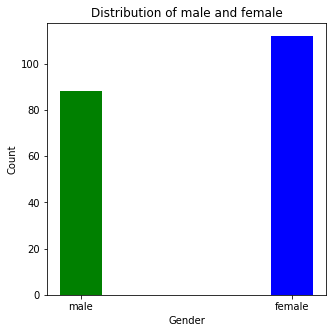

In [ ]:
# Visualization of the male and female distribution in the datset
x = ['male', 'female']
y = [(data.Gender=='Male').sum(), (data.Gender=='Female').sum()]
fig = plt.figure(figsize=(5,5))
plt.bar(x, y, width=0.2, align='center', color=['green', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of male and female')
plt.show()

### **Pre-processing**

**Feature Pruning**

From the dataset, the "CustomerID" column is a unique ID column and will not be useful for our training. So, we can drop the column from the dataset.

In [ ]:
# Drop the CustomerID column
data = data.drop(columns="CustomerID", axis=1)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Handling categorical variables**

As the model can only understand numeric values, we need to convert the values of the "Gender" column to numeric values. 

This can be done using the **"LabelEncoder"** function from the sklearn library.

The LabelEncoder will encodes the values M and F as 1 and 0 respectively.

In [ ]:
# Encoding the values of the gender column
le = LabelEncoder()
data['Gender']= le.fit_transform(data['Gender'])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


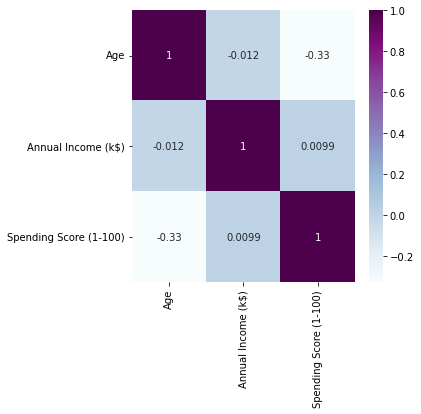

In [ ]:
# Display the correlation heatmap of the features
plt.figure(figsize=(5,5))
cor = data.drop('Gender', axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.BuPu)
plt.show()

From the above heatmap, we can see that none of the features are correlated and each feature has a specific weightage to the model training.

### **Model Training**

**Clustering**

A cluster is a collection of data points that have been grouped together due to particular similarities.

**KMeans Clustering:** K-means clustering is a basic and widely used unsupervised machine learning technique.

The purpose of this algorithm is to locate groups in the data, with the variable K representing the number of groups found. Based on the attributes supplied, the algorithm iteratively assigns each data point to one of the K groups. Each row of the dataset is treated as a single data point, and it is grouped based on feature similarity. 





In this problem, we are clustering the data by different combinations of features:

1.   Clustering with 'Age' and 'Spending Score'.
2.   Clustering with 'Annual Income' and 'Spending Score'.
3.   Clustering with 'Age', 'Annual Income' and 'Spending Score'.

**1. Clustering with 'Age' and 'Spending Score'**

In [ ]:
# Clustering with 'Age' and 'spending score'

X1 = data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
wcss1 = []
for n in range(1 , 11):
    model1 = KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, random_state= 10 ) 
    model1.fit(X1)
    wcss1.append(model1.inertia_)

We can check the optimal number of clusters by using the **elbow** method.

**Elbow method:** A critical element in any unsupervised approach is determining the appropriate number of clusters into which the data may be grouped. The Elbow Method is one of the most well-known methods for calculating the optimal value of k.


**WCSS (with-in cluster sum of squares):** WCSS is the sum of the squared distances between each point in a cluster and the centroid. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will begin to decline..

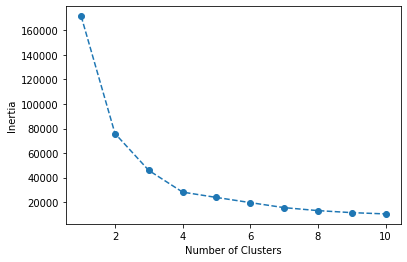

In [ ]:
# Plot the elbow graph
plt.plot(range(1,11), wcss1, linestyle="--", marker='o', label ="WCSS value")
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

**From the above graph, we can select the number of clusters as 4 and then again train our model with the ideal number of clusters and plot the centers of data.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


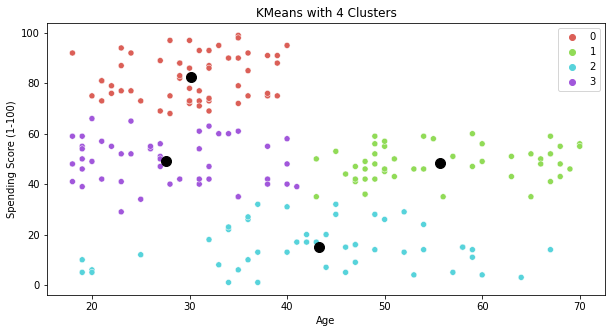

In [ ]:
# Display the clusters
model1 = KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, random_state= 10) 
model1.fit(X1)
labels1 = model1.labels_
centroids1 = model1.cluster_centers_
plt.figure(figsize=(10, 5))
sns.scatterplot(data['Age'], data['Spending Score (1-100)'], hue=labels1, 
                palette=sns.color_palette('hls', 4))
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1], s=100, c='black', label='center')
plt.title('KMeans with 4 Clusters')
plt.show()

**2. Clustering with 'Annual Income' and 'Spending Score'**

In [ ]:
# Clustering with 'Annual Income' and 'spending score'

X2 = data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
wcss2 = []
for n in range(1 , 11):
    model2 = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, random_state= 10 ) )
    model2.fit(X2)
    wcss2.append(model2.inertia_)

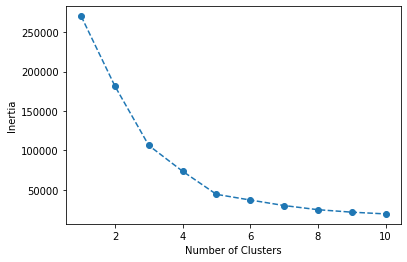

In [ ]:
#plot the graph of the elbow method
plt.plot(range(1,11), wcss2, linestyle="--", marker='o', label ="WCSS value")
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

**From the above graph, we can select 5 as the optimal number of clusters and train our model.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


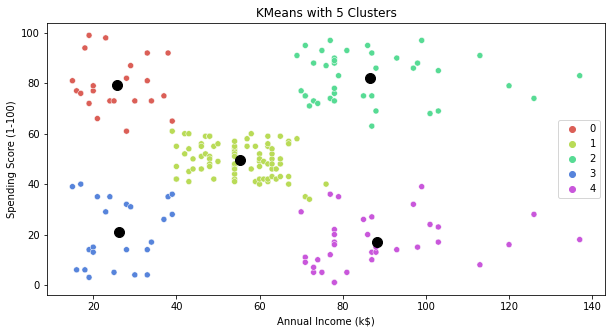

In [ ]:
#plot the graph of the data with the centers 
model2 = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, random_state= 10) )
model2.fit(X2)
labels2 = model2.labels_
centroids2 = model2.cluster_centers_
plt.figure(figsize=(10, 5))
sns.scatterplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], hue=labels2, 
                palette=sns.color_palette('hls', 5))
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1], s=100, c='black', label='center')
plt.title('KMeans with 5 Clusters')
plt.show()

**3. Clustering with 'Age', 'Annual Income' and 'Spending Score'**

In [ ]:
#Clustering with 'Age', 'Annual Income' and 'spending score'

X3 = data[['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
wcss3 = []
for n in range(1 , 11):
    kmeans3 = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, random_state= 10 ) )
    kmeans3.fit(X3)
    wcss3.append(kmeans3.inertia_)

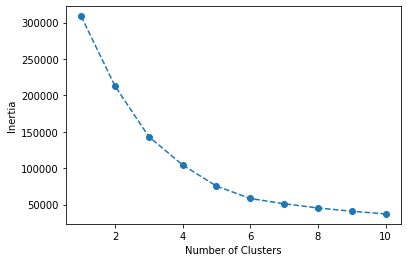

In [ ]:
#plot the graph of the elbow method
plt.plot(range(1,11), wcss3, linestyle="--", marker='o', label ="WCSS value")
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

**From the above graph, we can select 6 clusters as the optimal number of clusters.**

In [ ]:
#plot the 3D graph to show the clusters
kmeans3 = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, random_state= 10) )
kmeans3.fit(X3)
labels3 = kmeans3.labels_
centroids3 = kmeans3.cluster_centers_

trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Spending Score (1-100)'],
    z= data['Annual Income (k$)'],
    mode='markers',
     marker=dict(color = labels3, size= 20, line=dict(color= labels3, width= 30), opacity=0.8) )
data = [trace1]
layout = go.Layout(title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')) )
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)